## Simple ML model with basic text Processing

- divide data for blind validation
- check if target veriable is balance or not
- remove all junk
- use steming
- use TF-IDF
- apply ml model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import time

In [2]:
data=pd.read_csv('Data/train.csv')
data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


## divide data for blind validation

In [3]:
from sklearn.model_selection import train_test_split
data,blind_data=train_test_split(data,test_size=0.3)

### Check target variable is balance or not

In [4]:
data['sentiment'].value_counts()

1    2989
2    1690
0     322
3      90
Name: sentiment, dtype: int64

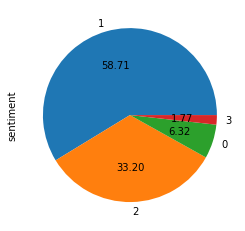

In [5]:
data['sentiment'].value_counts().plot(kind='pie',autopct='%2.2f')

## Remove Junk from text and apply stemming

In [6]:
import re

In [7]:
match_patt=r'#[0-9a-z_]+|@[0-9a-z]+|https://\w+[./\w]+|http://\w+[./\w]+|bit.ly[/\.\w]+|[^a-z]|[\d]+'
# hashtag '#[0-9a-z_]+'
# mention '@[0-9a-z]+'
# website 'https://\w+[./\w]+|http://\w+[./\w]+'
# short website 'bit.ly[/\.\w]+'
# punctuations '[^a-z]'
# numbers '[\d]+'
def find_pat(txt):
    return re.sub(match_patt,' ',txt,flags=re.I)

In [8]:
corpus=[]
pstem=nltk.stem.PorterStemmer()

In [9]:
for i in data['tweet']:
    text=find_pat(str(i)).lower()
    text=nltk.word_tokenize(text)
    text=[pstem.stem(i) for i in text if i not in nltk.corpus.stopwords.words('english') and len(i)>3]
    text=' '.join(text)
    corpus.append(text)

In [10]:
corpus

['farmer prefer balckberri iphon andriod devic durabl anti appl feel',
 'good point love quot appl come cool technolog confer quot',
 'time everyth ipad brand winner sxsw link',
 'check googl keynot wisconsin',
 'excel go iphon guid free march hard beat free',
 'sxsw download free track music sampler avail store today link',
 'appl open store austin sxsw link',
 'even begin appl win link',
 'longest line appl store cours link',
 'stumbl upon googl bing session full terrif',
 'yayrt store includ uberguid sponsor link',
 'vatornew googl appl forc print media evolv link',
 'quot everyon alreadi quot anti theft protect leav laptop ipad latt',
 'appl open store austin sxsw link',
 'someon use right appl store better',
 'badger angel news link nice also give away free ipad link',
 'aron pilhof york time endors html ipad cont link',
 'anyon els troubl synch schedul android sxsw',
 'give away ipad kick time visit page info link',
 'well ipad commerci want minim wear tear laptop',
 'meet bought

## use count vectorization

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf_vec=TfidfVectorizer(max_features=2709)

In [13]:
X=tfidf_vec.fit_transform(corpus).toarray()

In [14]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y=data['sentiment']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

## blind data process

In [17]:
blind_corpus=[]
for i in blind_data['tweet']:
    text=find_pat(str(i)).lower()
    text=nltk.word_tokenize(text)
    text=[pstem.stem(i) for i in text if i not in nltk.corpus.stopwords.words('english') and len(i)>3]
    text=' '.join(text)
    blind_corpus.append(text)

In [18]:
blind_X=tfidf_vec.transform(blind_corpus).toarray()
blind_y=blind_data['sentiment']

## apply ML model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [20]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

In [21]:
lr=LogisticRegression()
rf=RandomForestClassifier()
svm_cls=SVC(kernel='linear')
ml_nb=MultinomialNB()

In [22]:
models={
    lr:'LogisticRegression',
    rf:'RandomForestClassifier',
    svm_cls:'SVC',
    ml_nb:'MultinomialNB'
}

In [23]:
res=[]
for i in models:
    temp={}
    temp['Model']=models[i]
    start_time=time.time()
    i.fit(X_train,y_train)
    temp['Computation Time']=time.time()-start_time
    y_pred=i.predict(X_test)
    y_blind=i.predict(blind_X)
    temp['f1_score']=f1_score(y_test,y_pred,average='weighted')
    temp['f1_score_blind']=f1_score(blind_y,y_blind,average='weighted')
    temp['accuracy_score']=accuracy_score(y_test,y_pred)
    temp['precision_score']=precision_score(y_test,y_pred,average='weighted')
    temp['recall_score']=recall_score(y_test,y_pred,average='weighted')
    res.append(temp)
pd.DataFrame(res)

/home/kalpesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kalpesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kalpesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Computation Time,f1_score,f1_score_blind,accuracy_score,precision_score,recall_score
0,LogisticRegression,1.888872,0.598692,0.611193,0.644634,0.628640,0.644634
1,RandomForestClassifier,11.984901,0.607266,0.627379,0.648560,0.639299,0.648560
2,SVC,73.940332,0.619240,0.623157,0.659031,0.645128,0.659031
3,MultinomialNB,0.027400,0.558965,0.565292,0.626309,0.571482,0.626309
